In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import gmaps
import requests
import matplotlib.pyplot as plt
import statistics
import numpy as np
from matplotlib.ticker import MultipleLocator

In [2]:
#creating the dataframe from CSV
order_data_df = pd.read_csv("mh_orders.csv")
order_data_df.head()


,Order ID,Order Date,Ordered By,Order Status,Order Total,Payment Type,Shipped,Product Details,Product SKU,Product Qty,Product Price,Phone,Email,Address,City,State,Zip,Country
0,4623,"Oct 28th, 2021",Ryan Meneghin,NaN,$521.46,QUOTE,No,"Bosch Ascenta Recessed Hndl, 6/2 Cycles, 50 dB...",SHE3AR76UC,1,$499.00,2196883292,meneghin2006@gmail.com,"633 Pearl Street, Unit 310",Denver,CO,80203,US
1,4622,"Oct 28th, 2021",David Marin,NaN,$2787.00,QUOTE,No,Frigidaire 30'' Front Control Freestanding El...,FFEH3054US,1,$898.00,7606042397,davescranes@gmail.com,1426 De Reamer Circle,Colorado Springs,CO,80915,US
2,4622,"Oct 28th, 2021",David Marin,NaN,$2787.00,QUOTE,No,Frigidaire 24'' Built-In Dishwasher (FFCD2418US),FFCD2418US,1,$494.00,7606042397,davescranes@gmail.com,1426 De Reamer Circle,Colorado Springs,CO,80915,US
3,4622,"Oct 28th, 2021",David Marin,NaN,$2787.00,QUOTE,No,Frigidaire 22.3 Cu. Ft. 33'' Standard Depth S...,FRSS2323AS,1,$1259.00,7606042397,davescranes@gmail.com,1426 De Reamer Circle,Colorado Springs,CO,80915,US
4,4621,"Oct 28th, 2021",Karen Dear,NaN,$1883.41,QUOTE,No,GE 7.8 cu. ft. Capacity Smart Front Load Elect...,GFD65ESPNSN,1,$899.00,3038288088,4kdear@gmail.com,13696 Lilac Street,Thornton,CO,80602,US


In [3]:
#Filtering to only show OUTLET orders
outlet_orders = order_data_df.loc[order_data_df['Product Details'].str.contains("OUTLET", case=False)]
outlet_orders.head()

,Order ID,Order Date,Ordered By,Order Status,Order Total,Payment Type,Shipped,Product Details,Product SKU,Product Qty,Product Price,Phone,Email,Address,City,State,Zip,Country
4,4621,"Oct 28th, 2021",Karen Dear,NaN,$1883.41,QUOTE,No,GE 7.8 cu. ft. Capacity Smart Front Load Elect...,GFD65ESPNSN,1,$899.00,3038288088,4kdear@gmail.com,13696 Lilac Street,Thornton,CO,80602,US
5,4621,"Oct 28th, 2021",Karen Dear,NaN,$1883.41,QUOTE,No,GE 4.8 cu. ft. Capacity Smart Front Load ENERG...,GFW650SPNSN,1,$899.00,3038288088,4kdear@gmail.com,13696 Lilac Street,Thornton,CO,80602,US
87,4573,"Oct 22nd, 2021",Jennifer Shay,Cancelled,$2736.82,QUOTE,No,Electrolux Front Load Perfect Steam&trade; Gas...,EFMG627UIW,1,$999.00,9703890111,jwshere@gmail.com,14032 W Exposition Dr,Lakewood,CO,80228,US
102,4563,"Oct 21st, 2021",Joe Keefe,NaN,$2343.26,QUOTE,No,Whirlpool 36-inch Wide Counter Depth Side-by-S...,WRS571CIHV,1,$1378.00,3035502492,j.keefe70@gmail.com,4495 Washington St,Denver,CO,80216,US
103,4563,"Oct 21st, 2021",Joe Keefe,NaN,$2343.26,QUOTE,No,Whirlpool 33-inch Wide Top Freezer Refrigerato...,WRT311FZDW,1,$859.00,3035502492,j.keefe70@gmail.com,4495 Washington St,Denver,CO,80216,US


In [4]:
#formatting
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_rows', None)

In [5]:
outlet_orders.head()

,Order ID,Order Date,Ordered By,Order Status,Order Total,Payment Type,Shipped,Product Details,Product SKU,Product Qty,Product Price,Phone,Email,Address,City,State,Zip,Country
4,4621,"Oct 28th, 2021",Karen Dear,NaN,$1883.41,QUOTE,No,GE 7.8 cu. ft. Capacity Smart Front Load Electric Dryer with Steam and Sanitize Cycle [OUTLET] (GFD65ESPNSN),GFD65ESPNSN,1,$899.00,3038288088,4kdear@gmail.com,13696 Lilac Street,Thornton,CO,80602,US
5,4621,"Oct 28th, 2021",Karen Dear,NaN,$1883.41,QUOTE,No,GE 4.8 cu. ft. Capacity Smart Front Load ENERGY STAR&reg; Steam Washer with SmartDispense&trade; UltraFresh Vent System with OdorBlock&trade; and Sanitize + Allergen [OUTLET] (GFW650SPNSN),GFW650SPNSN,1,$899.00,3038288088,4kdear@gmail.com,13696 Lilac Street,Thornton,CO,80602,US
87,4573,"Oct 22nd, 2021",Jennifer Shay,Cancelled,$2736.82,QUOTE,No,Electrolux Front Load Perfect Steam&trade; Gas Dryer with PredictiveDry&trade; and Instant Refresh - 8.0. Cu. Ft. [OUTLET] (EFMG627UIW),EFMG627UIW,1,$999.00,9703890111,jwshere@gmail.com,14032 W Exposition Dr,Lakewood,CO,80228,US
102,4563,"Oct 21st, 2021",Joe Keefe,NaN,$2343.26,QUOTE,No,Whirlpool 36-inch Wide Counter Depth Side-by-Side Refrigerator - 21 cu. ft. [OUTLET] (WRS571CIHV),WRS571CIHV,1,$1378.00,3035502492,j.keefe70@gmail.com,4495 Washington St,Denver,CO,80216,US
103,4563,"Oct 21st, 2021",Joe Keefe,NaN,$2343.26,QUOTE,No,Whirlpool 33-inch Wide Top Freezer Refrigerator - 20 cu. ft. [OUTLET] (WRT311FZDW),WRT311FZDW,1,$859.00,3035502492,j.keefe70@gmail.com,4495 Washington St,Denver,CO,80216,US


In [6]:
# changing datatype of "Order Date" column to an actual date
outlet_orders['Order Date'] = pd.to_datetime(outlet_orders['Order Date'])

/Users/joshdaniels/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
outlet_orders.head()

,Order ID,Order Date,Ordered By,Order Status,Order Total,Payment Type,Shipped,Product Details,Product SKU,Product Qty,Product Price,Phone,Email,Address,City,State,Zip,Country
4,4621,2021-10-28,Karen Dear,NaN,$1883.41,QUOTE,No,GE 7.8 cu. ft. Capacity Smart Front Load Electric Dryer with Steam and Sanitize Cycle [OUTLET] (GFD65ESPNSN),GFD65ESPNSN,1,$899.00,3038288088,4kdear@gmail.com,13696 Lilac Street,Thornton,CO,80602,US
5,4621,2021-10-28,Karen Dear,NaN,$1883.41,QUOTE,No,GE 4.8 cu. ft. Capacity Smart Front Load ENERGY STAR&reg; Steam Washer with SmartDispense&trade; UltraFresh Vent System with OdorBlock&trade; and Sanitize + Allergen [OUTLET] (GFW650SPNSN),GFW650SPNSN,1,$899.00,3038288088,4kdear@gmail.com,13696 Lilac Street,Thornton,CO,80602,US
87,4573,2021-10-22,Jennifer Shay,Cancelled,$2736.82,QUOTE,No,Electrolux Front Load Perfect Steam&trade; Gas Dryer with PredictiveDry&trade; and Instant Refresh - 8.0. Cu. Ft. [OUTLET] (EFMG627UIW),EFMG627UIW,1,$999.00,9703890111,jwshere@gmail.com,14032 W Exposition Dr,Lakewood,CO,80228,US
102,4563,2021-10-21,Joe Keefe,NaN,$2343.26,QUOTE,No,Whirlpool 36-inch Wide Counter Depth Side-by-Side Refrigerator - 21 cu. ft. [OUTLET] (WRS571CIHV),WRS571CIHV,1,$1378.00,3035502492,j.keefe70@gmail.com,4495 Washington St,Denver,CO,80216,US
103,4563,2021-10-21,Joe Keefe,NaN,$2343.26,QUOTE,No,Whirlpool 33-inch Wide Top Freezer Refrigerator - 20 cu. ft. [OUTLET] (WRT311FZDW),WRT311FZDW,1,$859.00,3035502492,j.keefe70@gmail.com,4495 Washington St,Denver,CO,80216,US


In [8]:
#Outlet orders previous to when we did the outlet changes
outlet_orders_prev_feb_21 = outlet_orders.loc[outlet_orders['Order Date'] < '2021-02-21']

In [9]:
#Outlet orders after we did the outlet changes
outlet_orders_after_feb_21 = outlet_orders.loc[outlet_orders['Order Date'] > '2021-02-21']
outlet_orders_after_feb_21.head()

,Order ID,Order Date,Ordered By,Order Status,Order Total,Payment Type,Shipped,Product Details,Product SKU,Product Qty,Product Price,Phone,Email,Address,City,State,Zip,Country
4,4621,2021-10-28,Karen Dear,NaN,$1883.41,QUOTE,No,GE 7.8 cu. ft. Capacity Smart Front Load Electric Dryer with Steam and Sanitize Cycle [OUTLET] (GFD65ESPNSN),GFD65ESPNSN,1,$899.00,3038288088,4kdear@gmail.com,13696 Lilac Street,Thornton,CO,80602,US
5,4621,2021-10-28,Karen Dear,NaN,$1883.41,QUOTE,No,GE 4.8 cu. ft. Capacity Smart Front Load ENERGY STAR&reg; Steam Washer with SmartDispense&trade; UltraFresh Vent System with OdorBlock&trade; and Sanitize + Allergen [OUTLET] (GFW650SPNSN),GFW650SPNSN,1,$899.00,3038288088,4kdear@gmail.com,13696 Lilac Street,Thornton,CO,80602,US
87,4573,2021-10-22,Jennifer Shay,Cancelled,$2736.82,QUOTE,No,Electrolux Front Load Perfect Steam&trade; Gas Dryer with PredictiveDry&trade; and Instant Refresh - 8.0. Cu. Ft. [OUTLET] (EFMG627UIW),EFMG627UIW,1,$999.00,9703890111,jwshere@gmail.com,14032 W Exposition Dr,Lakewood,CO,80228,US
102,4563,2021-10-21,Joe Keefe,NaN,$2343.26,QUOTE,No,Whirlpool 36-inch Wide Counter Depth Side-by-Side Refrigerator - 21 cu. ft. [OUTLET] (WRS571CIHV),WRS571CIHV,1,$1378.00,3035502492,j.keefe70@gmail.com,4495 Washington St,Denver,CO,80216,US
103,4563,2021-10-21,Joe Keefe,NaN,$2343.26,QUOTE,No,Whirlpool 33-inch Wide Top Freezer Refrigerator - 20 cu. ft. [OUTLET] (WRT311FZDW),WRT311FZDW,1,$859.00,3035502492,j.keefe70@gmail.com,4495 Washington St,Denver,CO,80216,US


In [10]:
#removing characters and turning "Order Total"  into a numeric value
outlet_orders['Order Total'] = outlet_orders['Order Total'].str.replace(',', '')
outlet_orders['Order Total'] = outlet_orders['Order Total'].str.replace('$', '')
outlet_orders['Order Total'] = pd.to_numeric(outlet_orders['Order Total'])

/Users/joshdaniels/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/joshdaniels/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/joshdaniels/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [11]:
#grouping order totals by date

total_orders = outlet_orders.groupby(["Order Date"])["Order Total"].sum()
Order_ID = outlet_orders["Order ID"].count()



orders_plot_df = pd.DataFrame({
    "Total Orders": total_orders,
    "Order ID": Order_ID
    })

orders_plot_df.head()

,Total Orders,Order ID
Order Date,,
2020-09-03,1888.68,207
2020-09-06,3115.84,207
2020-09-25,3145.36,207
2020-10-07,1557.46,207
2020-10-23,1892.01,207


In [12]:
#reseting index
orders_plot_df = orders_plot_df.reset_index()

In [13]:
# 4. Creating an outlet sales per month pivot table  
orders_pivot = orders_plot_df.pivot(index="Order Date",columns='Order ID',values="Total Orders")
orders_pivot.head(10)

Order ID,207
Order Date,
2020-09-03,1888.68
2020-09-06,3115.84
2020-09-25,3145.36
2020-10-07,1557.46
2020-10-23,1892.01
2020-10-26,914.16
2020-10-27,1584.19
2020-10-28,1038.96
2020-11-03,2078.96


In [18]:
#setting index
orders_pivot.index = pd.to_datetime(orders_pivot.index)

In [19]:
#resampling data by month
sum_orders_month = orders_pivot.resample("M").sum()
sum_orders_month

Order ID,207
Order Date,
2020-09-30,8149.88
2020-10-31,6986.78
2020-11-30,39191.10
2020-12-31,8453.03
2021-01-31,37189.54
2021-02-28,10867.72
2021-03-31,58936.29
2021-04-30,53919.93
2021-05-31,45241.31


In [20]:
x_axis = ["Jan", "Feb", "Mar", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

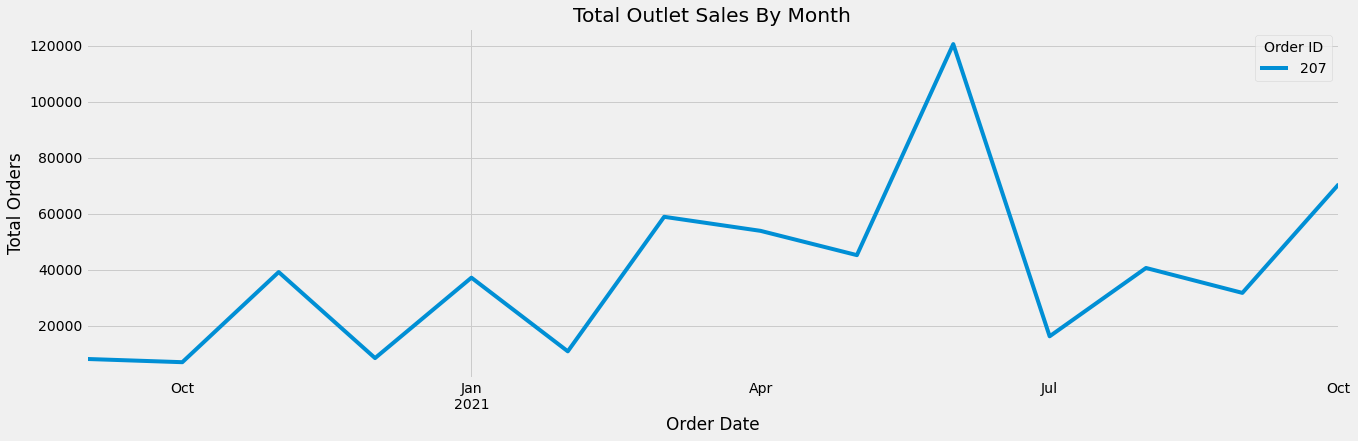

<Figure size 432x288 with 0 Axes>

In [21]:
#Plotting the Chart
monthly_outlet_orders = sum_orders_month.plot(figsize = (20,6))
monthly_outlet_orders.set_title("Total Outlet Sales By Month")
#  Add a x- and y-axis label.
monthly_outlet_orders.set_xlabel("Order Date")
monthly_outlet_orders.set_ylabel("Total Orders")

plt.show()
plt.tight_layout()

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')